In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn import linear_model

In [2]:
file_train = 'Food_Data_Train.xlsx'
file_x_test = 'Food_Data_Test.xlsx'
missing_val = '-'

In [3]:
def read_data(file_name):
    # Reading file
    print ('Filename : ', file_name)
    ds = pd.read_excel(file_name, na_values=missing_val)
    return (ds)

In [4]:
# remove skewness of data
def remove_skew(x):
    for col in x.columns:
        if x.skew().loc[col] > 0.55:
            x[col] = np.sqrt(x[col]) 
    return (x)

In [5]:
# Subroutine for boxplot
def plot_box(column):
    sns.boxplot(column)
    plt.show()
    return

In [6]:
# Swarmplot
def plot_swarm(col1, col2, ds):
    sns.swarmplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [7]:
# Distributionplot
def plot_dist(column):
    sns.distplot(column)
    plt.show()
    return

In [8]:
# Histogram
def plot_hist(column):
    plt.hist(column)
    plt.show()
    return

In [9]:
# Violinplot
def plot_violin(column):
    sns.violinplot(column)
    plt.show()
    return

In [10]:
# categoryplot
def plot_cat(col1, ds):
    sns.catplot(x=col1, data=ds)
    plt.show()
    return

In [11]:
# Boxenplot
def plot_boxen(column):
    sns.boxenplot(column)
    plt.show()
    return

In [12]:
# Barplot
def plot_bar(col1, col2, ds):
    sns.barplot(x=col1, y=col2, data=ds)
    plt.show()
    return

In [13]:
# Lineplot
def plot_line(col1, col2, ds):
    ds.plot(col1, col2, kind='line')
    plt.show()
    return

In [14]:
# pairplot
def plot_pair(ds):
    sns.pairplot(ds)
    plt.show()
    return

In [15]:
def my_func(ds, type_data):    

    print ('\n Printing head of data: ', ds.head())    
    print ('\nInitial shape of dataset: ', ds.shape)
    
    # Removing the duplicate rows from the dataset
    print ('\nShape of dataset before removing duplicates: ', ds.shape)
    # Dropping the duplicate rows
    ds = ds.drop_duplicates(keep='first')
    print ('Shape of dataset after removing duplicates: ', ds.shape)
    
    # Checking columns of dataset
    print ('\n Columns of dataset: \n\n', ds.columns)
    
    # data types of columns
    print ('\nData types of columns:\n\n ', ds.dtypes)
    
    # Info of columns
    print ('\nInfo of columns: \n\n')
    print (ds.info())
    
    # identifying the number columns
    ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
    print ('\n Integer Data Columns in the dataset: \n\n', ds_int.columns)
    
    # identifying the category columns
    ds_cat = ds.select_dtypes(include=['object'])
    print ('\n Category columns in the dataset:\n\n', ds_cat.columns)
    
    print ('\nStatistical Summary: \n\n')
    print (ds.describe())

    print ('\n Checking for null values in the dataset: \n\n', ds.isnull().sum())
    ds.replace(np.NaN, 0, inplace=True)
    print ('\n Checking the dataset after removing null values: \n\n', ds.isna().sum())
    
    print ('\nPrinting head of the data: \n', ds.head())
    
    if (type_data == 'Train'):
        print ('\ncorelation of data in the dataset\n', ds.corr())    

    print ('\n Checking the unique values of columns of dataset\n\n')
    for i in ds_cat:
        print ('\n', i , ':  ', ds[i].unique())
    
    print ('\n Univariate Analysis\n\n')    
    
    print ('\nUsing LabelEncoder to convert categorical data to number data\n\n')
    le = LabelEncoder()    
    for i in ds_cat:
        ds[i] = le.fit_transform(ds[i].astype(str))        
    print ('\n Data Types after using LabelEncoder\n\n', ds.dtypes)

    print ('\nViolin/'plot:\n\n')
    print ('\n It shows where the more values of the dataset lies\n')    
    plot_violin(ds['CUISINES'])
    plot_violin(ds['TIME'])
    plot_violin(ds['CITY'])
    plot_violin(ds['LOCALITY']) 
    plot_violin(ds['RATING'])
    plot_violin(ds['VOTES'])

    print ('\nPlotting outliers:\n\n')    
    plot_box(ds['CUISINES'])
    plot_box(ds['TIME'])
    plot_box(ds['CITY'])
    plot_box(ds['LOCALITY'])
    plot_box(ds['RATING'])
    plot_box(ds['VOTES'])
    
    print ('\nDistribution plot: To check the skewness of data\n\n')
    plot_dist(ds['CUISINES'])
    plot_dist(ds['TIME'])
    plot_dist(ds['CITY'])
    plot_dist(ds['LOCALITY'])
    plot_dist(ds['RATING'])
    plot_dist(ds['VOTES'])
    print ('\n Distribution plot shows data is not normally distributed\n\n')    
    
    print ('\nHistograms: It show the frequency distribution of the data\n\n')
    plot_hist(ds['CUISINES'])
    plot_hist(ds['TIME'])
    plot_hist(ds['CITY'])
    plot_hist(ds['LOCALITY'])
    plot_hist(ds['RATING'])
    plot_hist(ds['VOTES'])
    
    print ('\nBivariate Analysis\n\n')    
    print ('\nLineplot\n\n')
    plot_line('CUISINES', 'RATING', ds)
    plot_line('CUISINES', 'VOTES', ds)
    plot_line('RATING', 'VOTES', ds)
           
    if (type_data == 'Train'):
        print ('\nBarplots\n\n')
        plot_bar(ds['CUISINES'], ds['COST'], ds)
        plot_bar(ds['RATING'], ds['COST'], ds)
        plot_bar(ds['VOTES'], ds['COST'], ds)
        plot_bar(ds['LOCALITY'], ds['COST'], ds)
        
    plot_line('CUISINES', 'RATING', ds)        
    plot_pair(ds)
    
    print('\nChecking the \'z score\' / outliers of the dataset, if present, will remove it\n\n')
    z_scr = abs(zscore(ds))
    print ('Before removing zscore: ', ds.shape)

    ds_final = ds.loc[(z_scr < 3).all(axis=1)]
    print ("After removing zscore: ", ds_final.shape)
    
    print ('\nAssigning the input and output data\n\n')    
    if (type_data == 'Train'):
        df_x = ds_final.drop(columns = ['COST'])
        y = ds_final['COST']
        print ('\nY Shape : ', y.shape)
    else:
        df_x =  ds_final    
    
    print ('\nStandardScaler is used to scale the data\n\n')
    sc = StandardScaler()
    x = sc.fit_transform(df_x)
    x = pd.DataFrame(x, columns=df_x.columns)
    print ('\n X shape : ', x.shape)
    
    print ('\nChecking the skewness of data\n\n')
    print ( x.skew())
    
    skew_flag = 0
    print ('\nskew flag : ', skew_flag)
    print ('\nRemoving skewness of data\n\n')
    
    while (skew_flag > -1):
        for col in x.columns:
            print ('\nFor loop Skew: \n', x.skew())
            if x.skew().loc[col] > 0.55:
                print ('\n Inside remove skew data function : \n')
                flag = 1
                x = remove_skew(x)
        print ('\nOutside the loop: \n')
        skew_flag = -1       

            
    print ('\nreplacing NaN values with 0\n\n')    
    x.replace(np.NaN, 0, inplace=True)
    
    if (type_data == 'Train'):
        return (x,y)
    else:
        return (x)

# Restaurant Food Price Training Dataset

In [16]:
ds = read_data(file_train)
ds

Filename :  Food_Data_Train.xlsx


TITLE  RESTAURANT_ID  \
0          CASUAL DINING           9438   
1      CASUAL DINING,BAR          13198   
2          CASUAL DINING          10915   
3            QUICK BITES           6346   
4         DESSERT PARLOR          15387   
...                  ...            ...   
12685        QUICK BITES          13228   
12686  CASUAL DINING,BAR           9686   
12687             LOUNGE          11133   
12688      CASUAL DINING           6134   
12689      CASUAL DINING           6430   

                                               CUISINES  \
0                           Malwani, Goan, North Indian   
1                        Asian, Modern Indian, Japanese   
2            North Indian, Chinese, Biryani, Hyderabadi   
3                                      Tibetan, Chinese   
4                                              Desserts   
...                                                 ...   
12685                       North Indian, Burger, Kebab   
12686                                 Goan, Continental   
12687          Finger Food, Continental, Asian, Chinese   
12688  North Indian, South Indian, Chinese, Street Food   
12689                             North Indian, Chinese   

                                                   TIME         CITY  \
0                11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)        Thane   
1                                  6pm – 11pm (Mon-Sun)      Chennai   
2                   11am – 3:30pm, 7pm – 11pm (Mon-Sun)      Chennai   
3                               11:30am – 1am (Mon-Sun)       Mumbai   
4                                  11am – 1am (Mon-Sun)       Mumbai   
...                                                 ...          ...   
12685  12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...    Hyderabad   
12686   12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...       Mumbai   
12687                        12noon – 12:30AM (Mon-Sun)  Navi Mumbai   
12688                           6am – 10:45pm (Mon-Sun)      Chennai   
12689                          12:30pm – 11pm (Mon-Sun)    Hyderabad   

                   LOCALITY RATING       VOTES  COST  
0            Dombivali East    3.6    49 votes  1200  
1                 Ramapuram    4.2    30 votes  1500  
2                Saligramam    3.8   221 votes   800  
3               Bandra West    4.1    24 votes   800  
4               Lower Parel    3.8   165 votes   300  
...                     ...    ...         ...   ...  
12685            Gachibowli    3.8   546 votes   500  
12686  Bandra Kurla Complex    4.3  1214 votes  1800  
12687                 Vashi    4.0   608 votes  1300  
12688           Maduravoyal    3.5    32 votes   400  
12689       Vanasthalipuram    3.4   677 votes   600  

[12690 rows x 9 columns]


 Printing head of data:                 TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lowe

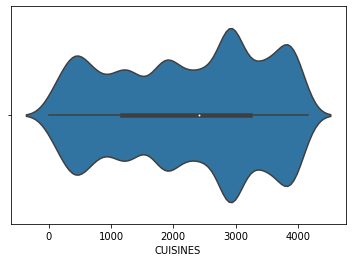

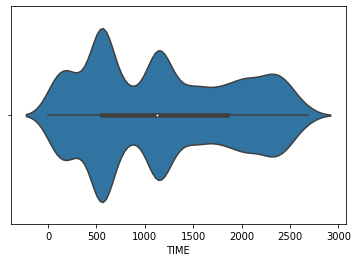

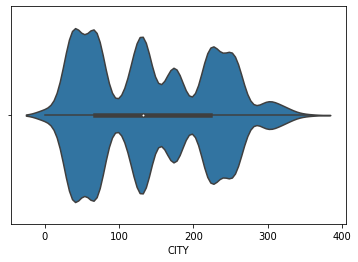

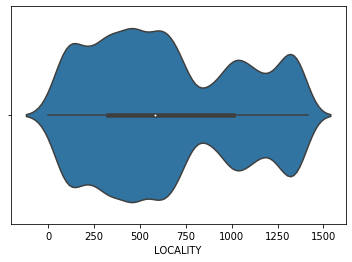

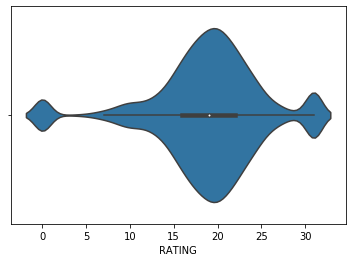

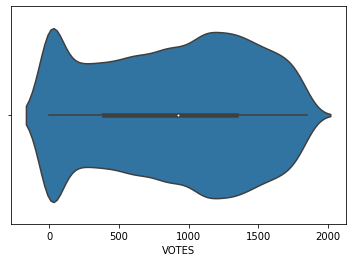


Plotting outliers:




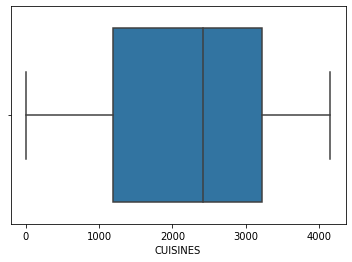

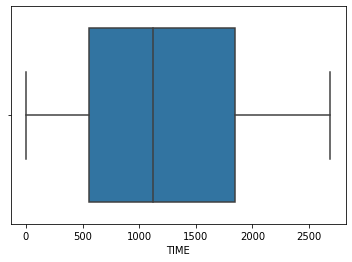

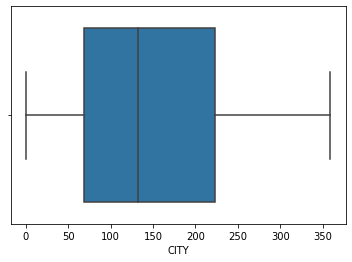

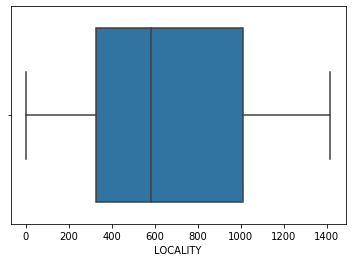

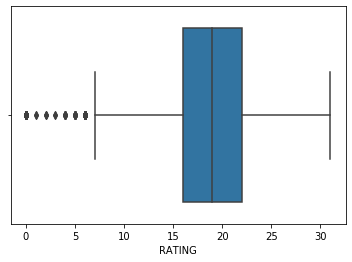

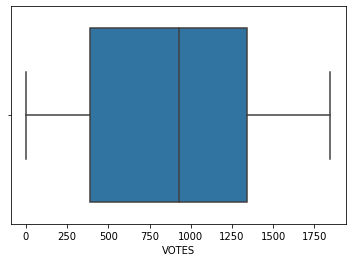


Distribution plot: To check the skewness of data




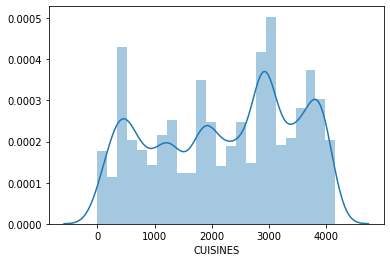

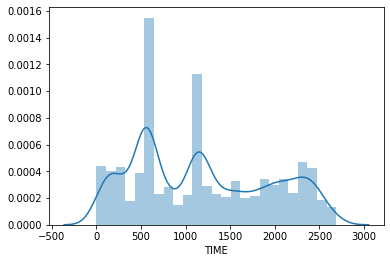

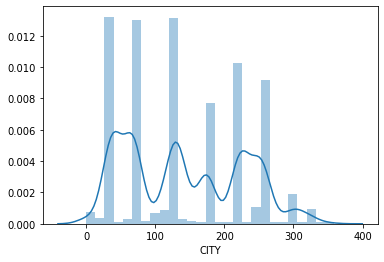

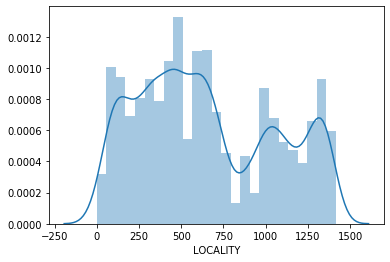

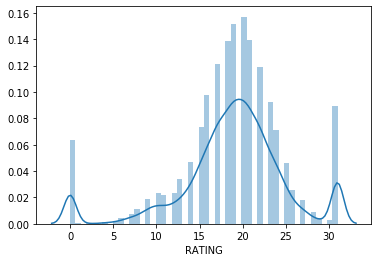

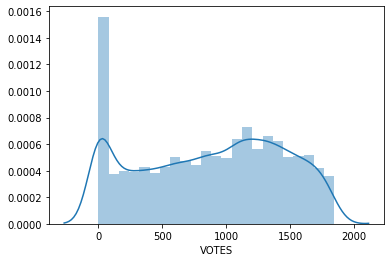


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




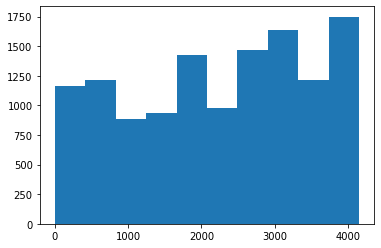

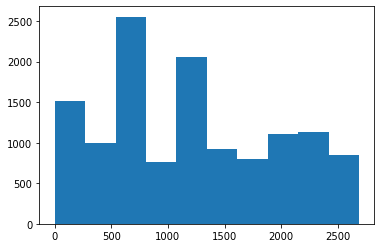

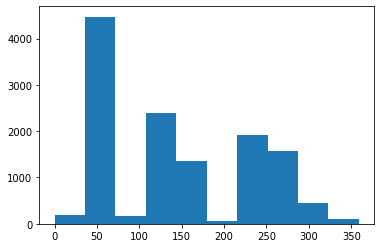

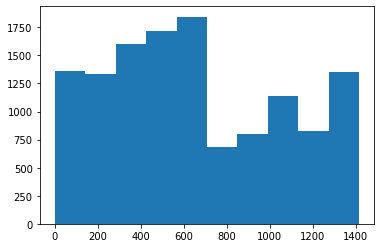

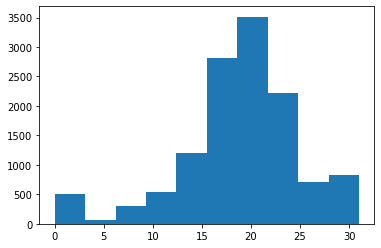

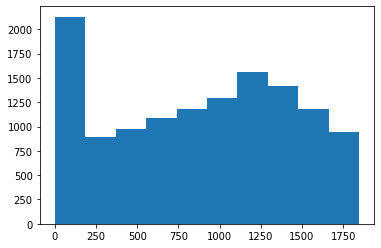


Bivariate Analysis



Lineplot




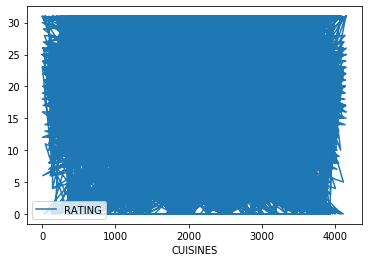

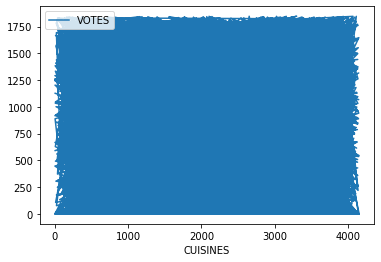

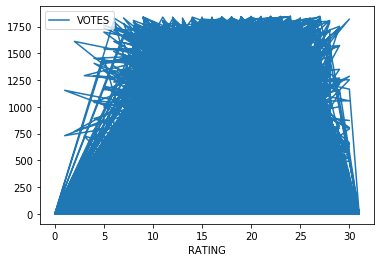


Barplots




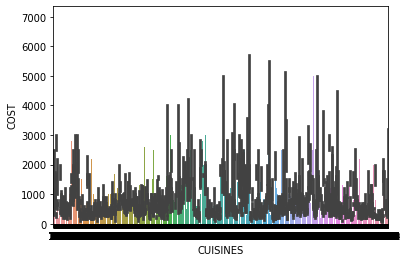

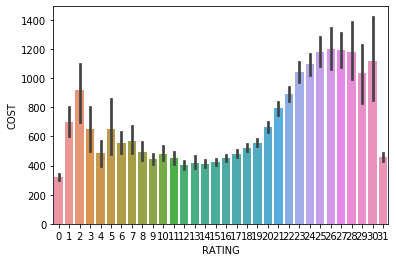

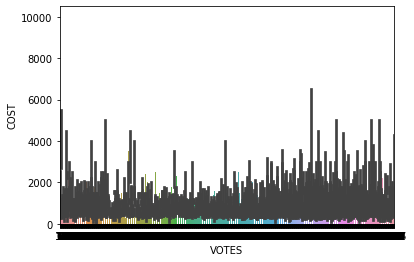

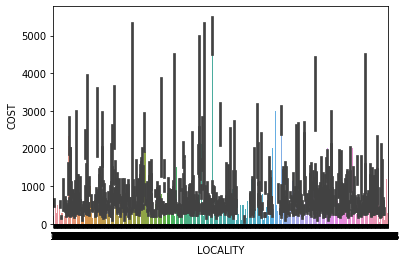

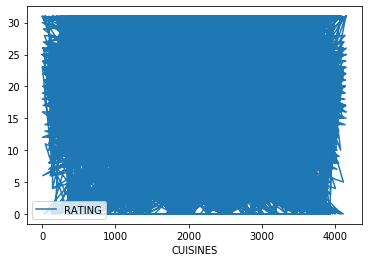

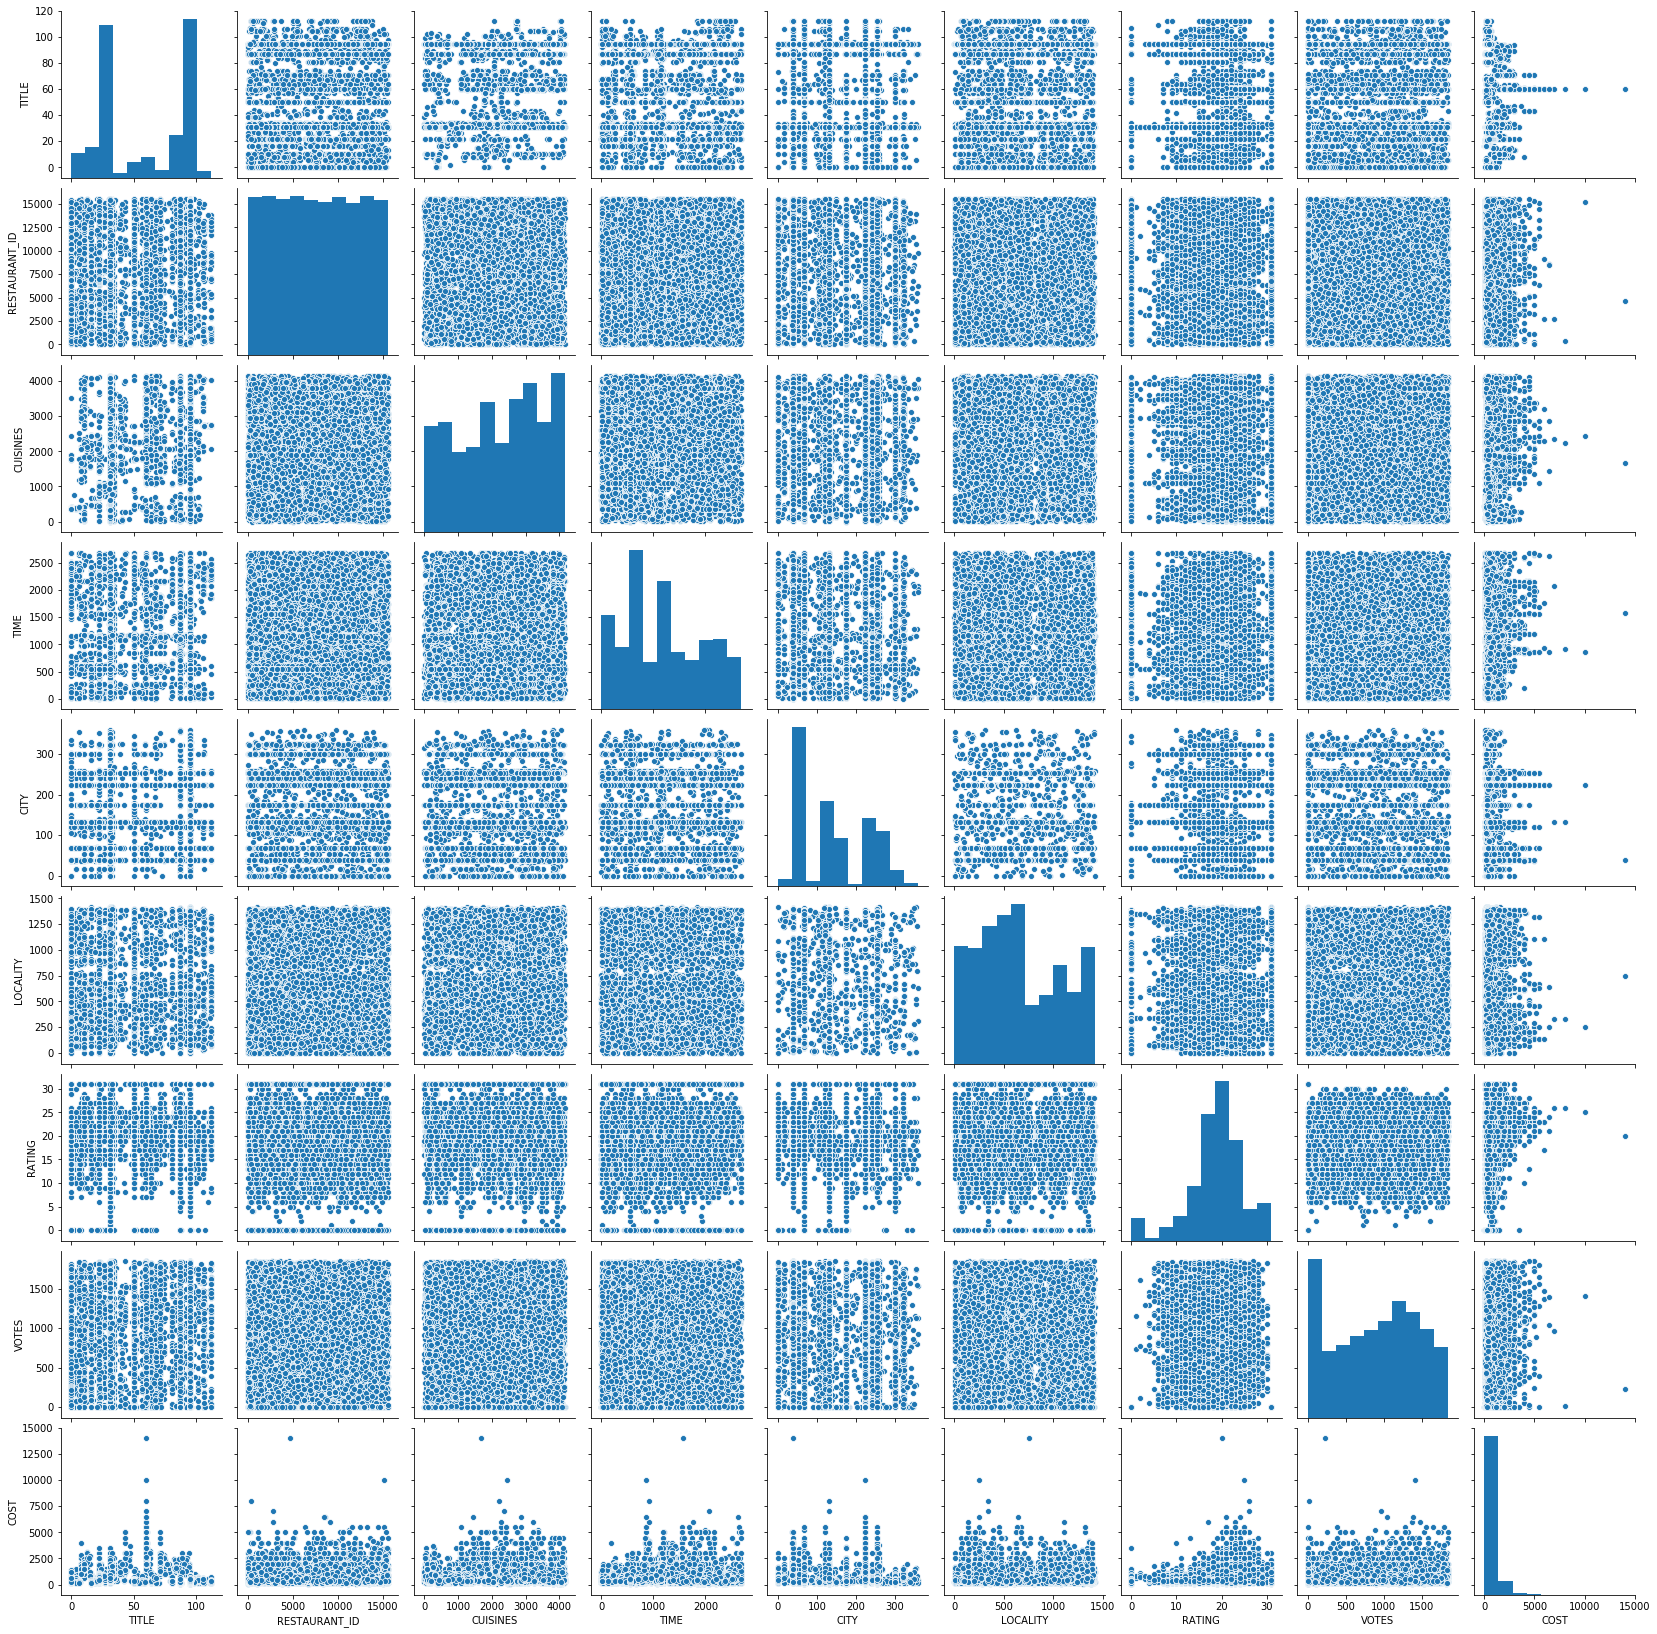


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (12665, 9)
After removing zscore:  (11946, 9)

Assigning the input and output data



Y Shape :  (11946,)

StandardScaler is used to scale the data



 X shape :  (11946, 8)

Checking the skewness of data


TITLE           -0.072002
RESTAURANT_ID    0.004161
CUISINES        -0.215811
TIME             0.341342
CITY             0.286939
LOCALITY         0.326537
RATING           0.142200
VOTES           -0.165034
dtype: float64

skew flag :  0

Removing skewness of data



For loop Skew: 
 TITLE           -0.072002
RESTAURANT_ID    0.004161
CUISINES        -0.215811
TIME             0.341342
CITY             0.286939
LOCALITY         0.326537
RATING           0.142200
VOTES           -0.165034
dtype: float64

For loop Skew: 
 TITLE           -0.072002
RESTAURANT_ID    0.004161
CUISINES        -0.215811
TIME             0.341342
CITY             0.286939
LOCALITY         0.326537
RATIN

In [17]:
(x1, y1) = my_func(ds, 'Train')
print ('\nTraining dataset shape: ', x1.shape, y1.shape)

# Restaurant Food Price Testing Dataset

In [18]:
(ds) = read_data(file_x_test)
ds

Filename :  Food_Data_Test.xlsx


TITLE  RESTAURANT_ID  \
0     CASUAL DINING           4085   
1       QUICK BITES          12680   
2     CASUAL DINING           1411   
3              None            204   
4       QUICK BITES          13453   
...             ...            ...   
4226  CASUAL DINING           9057   
4227           None           1247   
4228    QUICK BITES           8617   
4229    QUICK BITES           6485   
4230    QUICK BITES           2421   

                                           CUISINES  \
0             North Indian, Chinese, Mughlai, Kebab   
1      South Indian, Fast Food, Pizza, North Indian   
2           North Indian, Seafood, Biryani, Chinese   
3                                           Biryani   
4                              South Indian, Kerala   
...                                             ...   
4226                 North Indian, Mughlai, Chinese   
4227  Biryani, North Indian, Sandwich, Salad, Wraps   
4228                      Continental, North Indian   
4229                               Rolls, Beverages   
4230                                        Mughlai   

                                                   TIME         CITY  \
0                         12noon – 12midnight (Mon-Sun)        Noida   
1                               7am – 12:30AM (Mon-Sun)       Mumbai   
2                              11am – 11:30pm (Mon-Sun)       Mumbai   
3     9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...    Faridabad   
4                                 11am – 10pm (Mon-Sun)        Kochi   
...                                                 ...          ...   
4226                        11:30am – 11:30pm (Mon-Sun)    New Delhi   
4227                               11am – 1am (Mon-Sun)    Bangalore   
4228                         9:30am – 10:30pm (Mon-Sun)    Faridabad   
4229  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        Kochi   
4230                                5pm – 1am (Mon-Sun)  Bandra West   

              LOCALITY RATING       VOTES  
0            Sector 18    4.3   564 votes  
1           Grant Road    4.2    61 votes  
2         Marine Lines    3.8   350 votes  
3                  NIT    3.8  1445 votes  
4               Kaloor    3.6    23 votes  
...                ...    ...         ...  
4226      Punjabi Bagh    3.9   287 votes  
4227        HSR Layout    4.3   469 votes  
4228         Sector 86    3.7    53 votes  
4229             Kochi    NaN         NaN  
4230  Perry Cross Road    3.7    63 votes  

[4231 rows x 8 columns]


 Printing head of data:             TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   



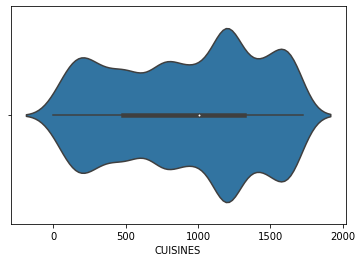

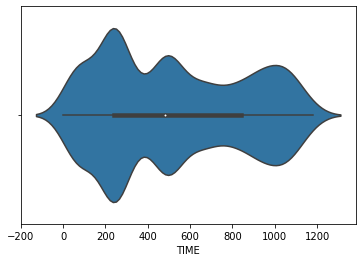

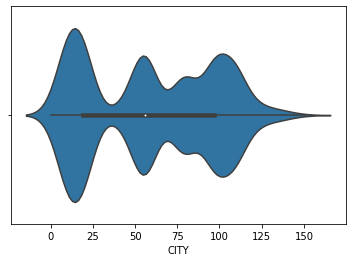

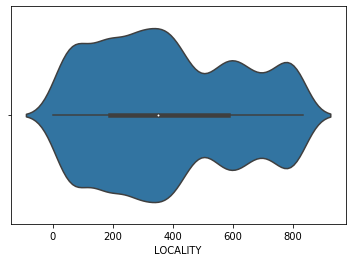

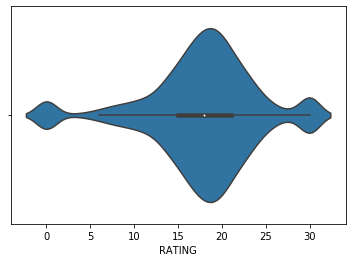

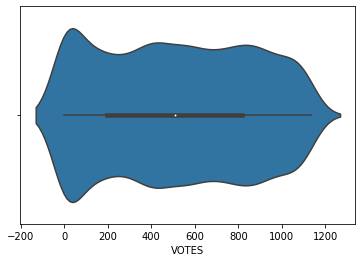


Plotting outliers:




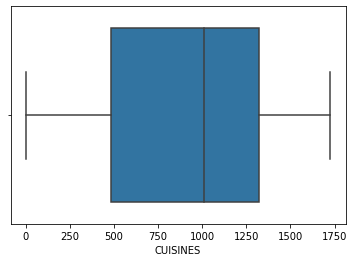

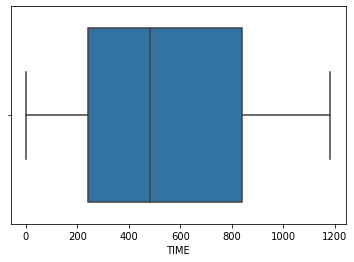

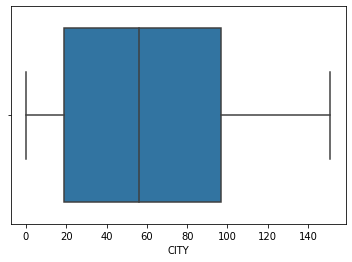

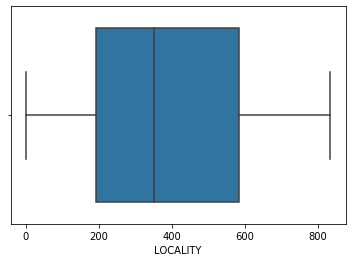

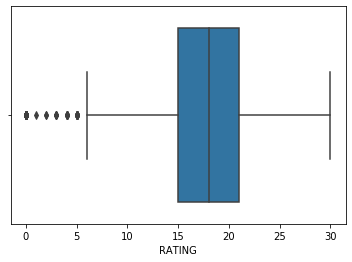

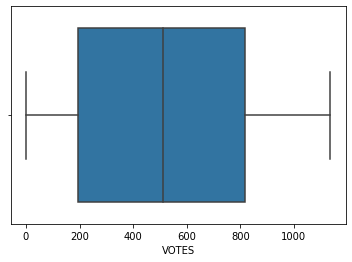


Distribution plot: To check the skewness of data




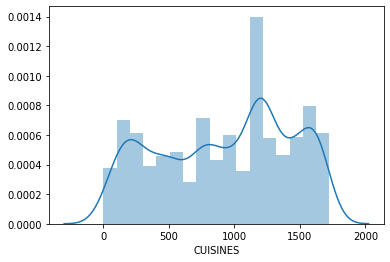

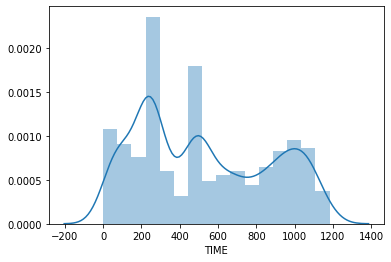

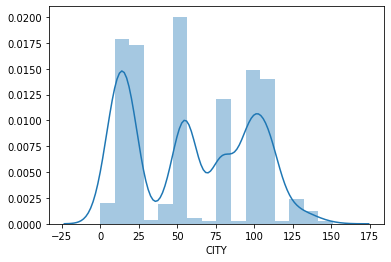

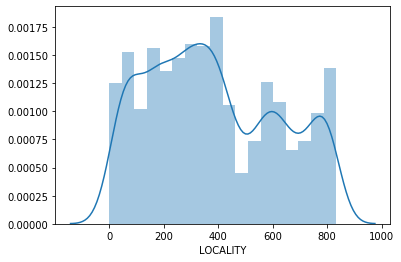

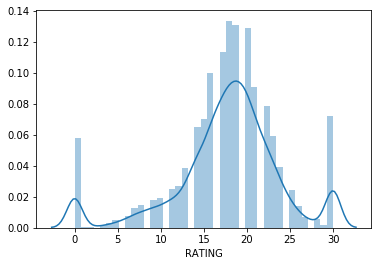

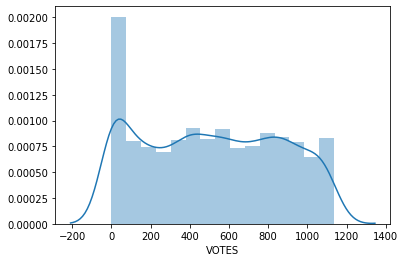


 Distribution plot shows data is not normally distributed



Histograms: It show the frequency distribution of the data




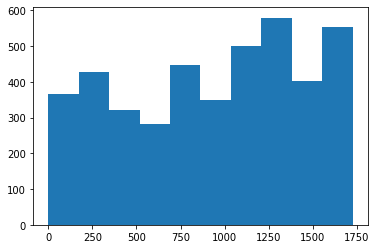

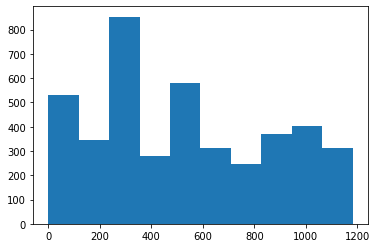

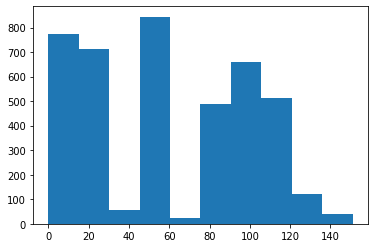

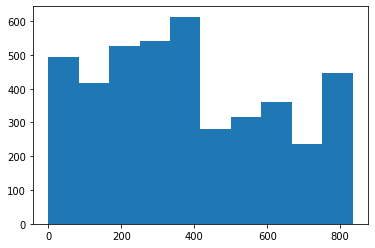

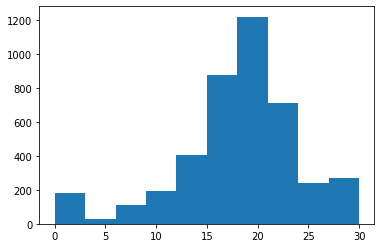

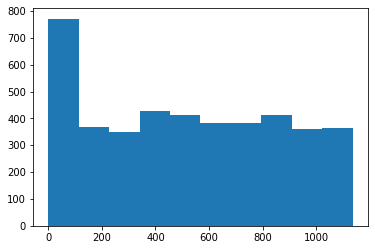


Bivariate Analysis



Lineplot




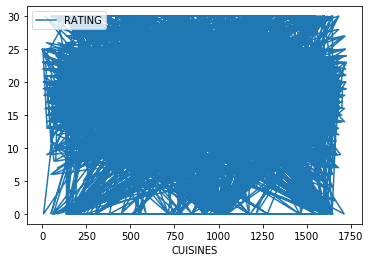

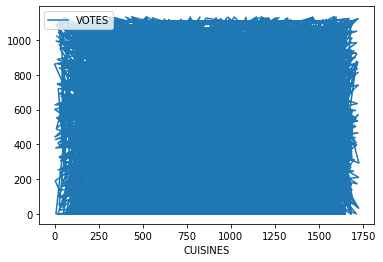

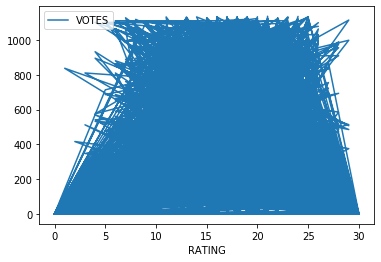

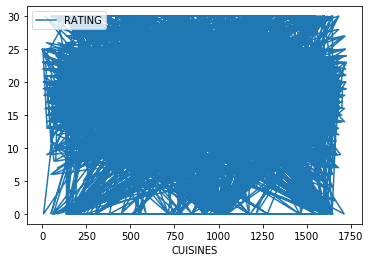

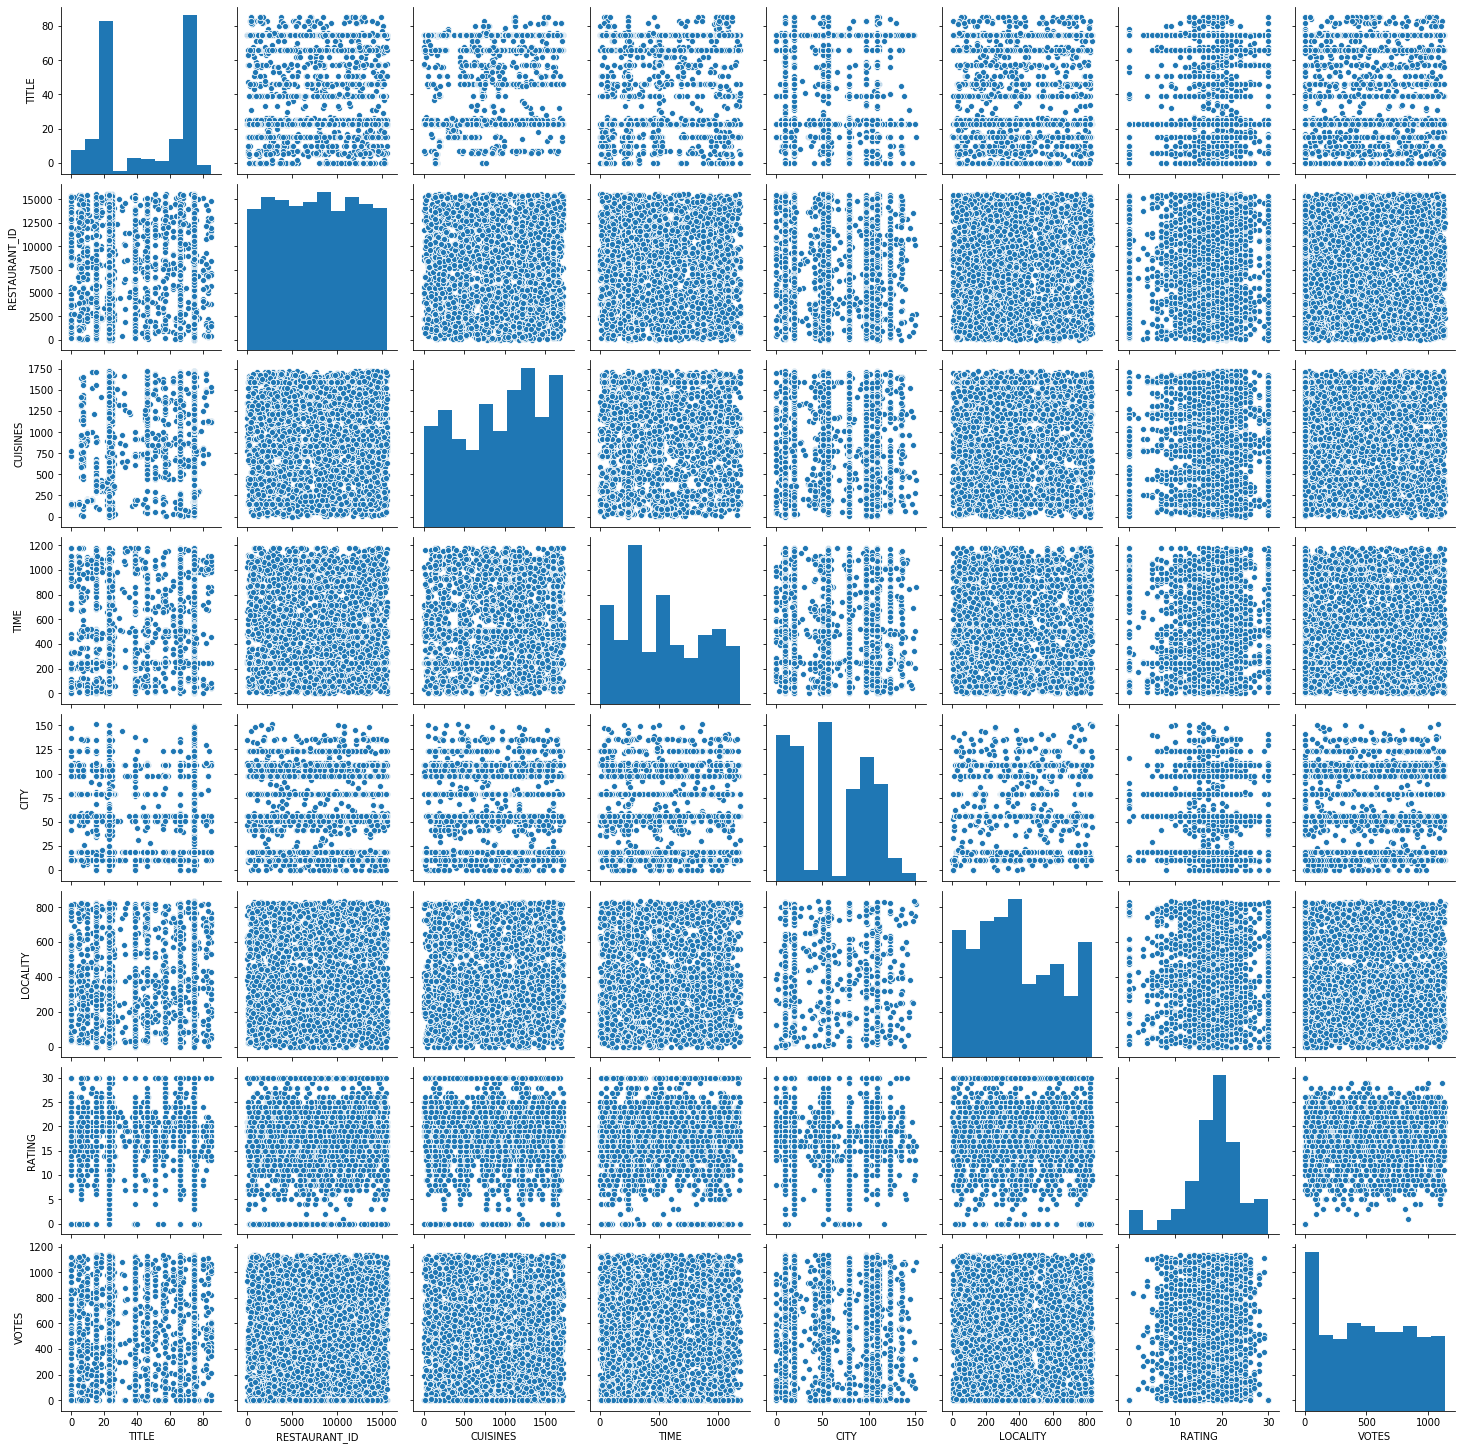


Checking the 'z score' / outliers of the dataset, if present, will remove it


Before removing zscore:  (4230, 8)
After removing zscore:  (4230, 8)

Assigning the input and output data



StandardScaler is used to scale the data



 X shape :  (4230, 8)

Checking the skewness of data


TITLE           -0.020354
RESTAURANT_ID    0.007058
CUISINES        -0.210741
TIME             0.314174
CITY             0.080237
LOCALITY         0.301632
RATING          -0.731686
VOTES            0.055108
dtype: float64

skew flag :  0

Removing skewness of data



For loop Skew: 
 TITLE           -0.020354
RESTAURANT_ID    0.007058
CUISINES        -0.210741
TIME             0.314174
CITY             0.080237
LOCALITY         0.301632
RATING          -0.731686
VOTES            0.055108
dtype: float64

For loop Skew: 
 TITLE           -0.020354
RESTAURANT_ID    0.007058
CUISINES        -0.210741
TIME             0.314174
CITY             0.080237
LOCALITY         0.301632
RATING          -0.731686
VOT

In [19]:
(x2) = my_func(ds, 'Test')
print ('\n Testing dataset shape: ', x2.shape)

In [20]:
# Subroutine to get the best random state with max r2_score

def max_r2_score (regr, x, y):
    max_r2_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test, y_pred)


        #print ("\nr2 score corresponding to state: ", r_state, " is: ", r2_scr)
        if (r2_scr > max_r2_score):
            max_r2_score = r2_scr
            final_r_state = r_state
    print ("\nMax r2 score corresponding to ", final_r_state, " is: ", max_r2_score)
    return final_r_state

In [21]:
# lets use linear regression and check max_r2_score corresponding to different random states

from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = max_r2_score(lreg, x1, y1)


Max r2 score corresponding to  79  is:  0.21970887882560164


In [22]:
# Lets use GridSearchRegressor to find optimal value of n_neighbors for KNN model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neighbors ={'n_neighbors' : range(1, 42)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x1, y1)
gknr.best_params_

{'n_neighbors': 15}

In [23]:
 # Lets use KNN regression and check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors = 15)
r_state = max_r2_score(knr, x1, y1)


Max r2 score corresponding to  88  is:  0.39700929056007395


In [24]:
# Lets check the mean r2 score of both linear regression model and knn regression

print ("Mean r2 score for linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in linear regression: ", cross_val_score(lreg, x1, y1, cv=5, scoring='r2').std())
print ("\n*****************\n")
print ("Mean r2 score for KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').mean())
print ("Standard deviation for r2 score in KNN regression: ", cross_val_score(knr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for linear regression:  0.1917887948478695
Standard deviation for r2 score in linear regression:  0.008467049519549906

*****************

Mean r2 score for KNN regression:  0.35637385420133116
Standard deviation for r2 score in KNN regression:  0.026395994555378235


In [25]:
# Lets check Lasso Regression and find best value of alpha

from sklearn.linear_model import Lasso, Ridge
lsreg = Lasso()
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x1, y1)
clf.best_params_

{'alpha': 1}

In [26]:
# Lets check max r2 score when we use Lasso

lsreg = Lasso(alpha=0.001)
r_state = max_r2_score (lsreg, x1, y1)


Max r2 score corresponding to  79  is:  0.2197087917024575


In [27]:
# Lets use cross_val_score with Lasso

print ('Mean r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard deviation in  r2 score for Lasso Regression: ', cross_val_score(lsreg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Lasso Regression:  0.19178889359005763
Standard deviation in  r2 score for Lasso Regression:  0.008466785316971134


In [28]:
# Now we will use Gradient Boosting technique 
# For getting best set of parameters we will use grid search 

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10, 10, 150, 200, 250, 300]}
clf = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [29]:
# Now we will use cross val score to check the mean r2 score and standard deviation
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300)
print ('Mean r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Gradient Boosting Regression: ', cross_val_score(gbr, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Gradient Boosting Regression:  0.7123740187216907
Standard Deviation in  r2 score for Gradient Boosting Regression:  0.02220960412985393


In [30]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(gbr, x1, y1)


Max r2 score corresponding to  94  is:  0.739475116948819


In [31]:
# Now Lets use AdaBostRegression algorithm 

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg = AdaBoostRegressor()
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [10,100, 150, 200, 250], 'base_estimator':[lreg, lsreg, DecisionTreeRegressor(), Ridge()]}

clf = GridSearchCV (ada_reg, parameters, cv=5)
clf.fit(x1,y1)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 250}

In [38]:
ada_reg = AdaBoostRegressor(base_estimator = Lasso(), learning_rate=1, n_estimators=250)
print ('Mean r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').mean())
print ('Standard Deviation in  r2 score for Ada Boosting Regression: ', cross_val_score(ada_reg, x1, y1, cv=5, scoring='r2').std())

Mean r2 score for Ada Boosting Regression:  0.1310369005990003
Standard Deviation in  r2 score for Ada Boosting Regression:  0.02857488673452805


In [39]:
# lets check maximum r2 score corresponding to this
r_state = max_r2_score(ada_reg, x1, y1)


Max r2 score corresponding to  57  is:  0.1822267563678016


In [40]:
# we tried all the models and till now GradientBoost Regression is the best
# random state corresponding to highest r2 score is 86

x_train, x_test, y_train, y_test = train_test_split(x1, y1, random_state=94, test_size = 0.20)
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=300)
gbr.fit(x_train, y_train)
y_pred =  gbr.predict(x2)
print (y_pred)

[1166.28212844  416.16750593  813.43172016 ...  427.39137092  489.71049931
  489.29134712]


In [41]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_restaurantfood.csv')

In [42]:
from sklearn.externals import joblib
joblib.dump(gbr, 'Project_Restaurantfood.pkl')
#clf = joblib.load('Project_Restaurantfood.pkl')
#clf.predict(x2)

array([1166.28212844,  416.16750593,  813.43172016, ...,  427.39137092,
        489.71049931,  489.29134712])